In [1]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt

In [2]:
# definimos el dataset
x = np.arange(-1,1, 0.005)                             #Creamos las cordenadas x
y = asarray([1.0+2.0*i+(4.0*(i**3.0)) for i in x])     #Creamos las cordenadas y
print(x.min(), x.max(), y.min(), y.max())

-1.0 0.9950000000000019 -5.0 6.930299500000026


In [3]:
# reshape los arrays en las filas y columnas
x = x.reshape((len(x), 1))
y = y.reshape((len(y), 1))

In [4]:
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler() 
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


In [5]:
model = Sequential()
model.add(Dense(10, input_dim=1, activation='tanh', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='sigmoid', kernel_initializer='he_uniform'))
model.add(Dense(1))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                20        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='mse', optimizer='Adam')

In [8]:
model.fit(x, y, epochs=500, batch_size=10, verbose=1)

Epoch 1/500
40/40 [==============================] - 0s 675us/step - loss: 0.2279
Epoch 2/500
40/40 [==============================] - 0s 750us/step - loss: 0.0416
Epoch 3/500
40/40 [==============================] - 0s 700us/step - loss: 0.0122
Epoch 4/500
40/40 [==============================] - 0s 700us/step - loss: 0.0103
Epoch 5/500
40/40 [==============================] - 0s 675us/step - loss: 0.0092
Epoch 6/500
40/40 [==============================] - 0s 650us/step - loss: 0.0083
Epoch 7/500
40/40 [==============================] - 0s 750us/step - loss: 0.0075
Epoch 8/500
40/40 [==============================] - 0s 700us/step - loss: 0.0068
Epoch 9/500
40/40 [==============================] - 0s 700us/step - loss: 0.0063
Epoch 10/500
40/40 [==============================] - 0s 675us/step - loss: 0.0059
Epoch 11/500
40/40 [==============================] - 0s 725us/step - loss: 0.0057
Epoch 12/500
40/40 [==============================] - 0s 775us/step - loss: 0.0056
Epoch 13/500


In [9]:
# hacemos predicciones para los datos de entrada
y_pred = model.predict(x)

In [10]:
# transformadas inversas
x_plot = scale_x.inverse_transform(x)
y_pred_plot = scale_y.inverse_transform(y_pred)

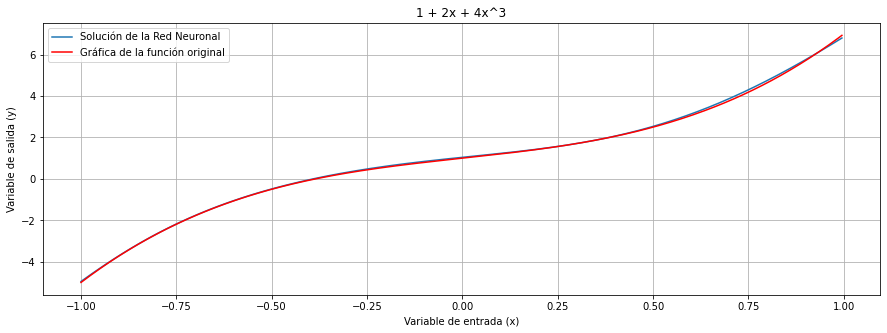

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(x_plot,y_pred_plot, label='Solución de la Red Neuronal')

plt.plot(x_plot,1.0+2.0*x_plot+(4.0*(x_plot**3.0)), label='Gráfica de la función original', color='red')

plt.title('1 + 2x + 4x^3')
plt.xlabel('Variable de entrada (x)')
plt.ylabel('Variable de salida (y)')
plt.legend()
plt.grid(which='both')
plt.show()

In [12]:
y = 1.0+2.0*x_plot+(4.0*(x_plot**3.0))
# reporte del error del modelo
print('MSE: %.3f' % mean_squared_error(y, y_pred_plot))

MSE: 0.002
